<a href="https://colab.research.google.com/github/RahulJuluru2/Unit1ClassPractice/blob/main/Copy_of_B19sessionRepresentingText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mdhabeebvulla/samples/master/spamnew.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('spamnew.csv',encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.iloc[:,0:2]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename({'v1':'etype','v2':'textdata'},axis=1,inplace=True)

In [ ]:
df.head()

,etype,textdata
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#df.replace({'ham':0,'spam':1})
from sklearn.preprocessing import LabelEncoder

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['textdata'],df['etype'],test_size =0.2,random_state=42)

In [ ]:
x_train.head()

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
Name: textdata, dtype: object

In [ ]:
y_train.head()

1978     ham
3989    spam
3935     ham
4078     ham
4086    spam
Name: etype, dtype: object

In [ ]:
Encoder = LabelEncoder()
Encoder.fit(y_train)
y_train = Encoder.transform(y_train)
y_test = Encoder.transform(y_test)

In [ ]:
y_train[0:150]

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(df['textdata'])  #understanding the pattern
x_train_tfidf = tfidf_vect.transform(x_train)
x_test_tfidf = tfidf_vect.transform(x_test)

In [ ]:
print(x_test_tfidf[:200])

In [ ]:
sv = SVC(kernel='linear')
sv.fit(x_train_tfidf,y_train)

SVC(kernel='linear')

In [ ]:
ypred = sv.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(ypred,y_test))

0.979372197309417


In [ ]:
testd = tfidf_vect.transform(['XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'])

In [ ]:
print(sv.predict(testd))

[1]


In [ ]:
from wordcloud import WordCloud

In [ ]:
df.head()

,etype,textdata
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df1 = df.replace({'spam':1,'ham':0})

In [ ]:
df1.head()

,etype,textdata
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


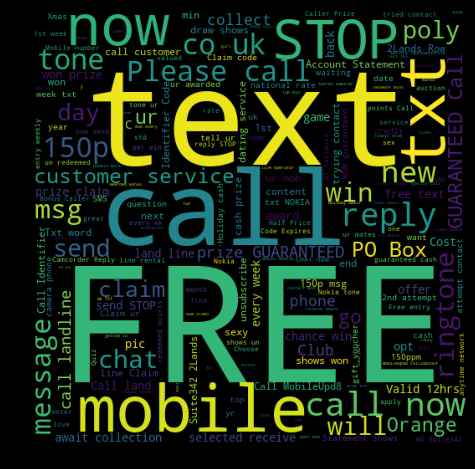

In [ ]:
spamw = ''.join(list(df1[df1['etype']==1]['textdata']))
spam_wcloud = WordCloud(width = 520,height=520).generate(spamw)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wcloud);

In [ ]:
spamw

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcvWINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 infoURGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or c